In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, ndimage
import cv2

In [4]:
img = mpimg.imread('Data/siriusb_cxo_big.jpg') # Full image

In [5]:
def plotHist(img):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    hist = plt.subplot(1,2,2)
    hist.set_ylabel('Count')
    hist.set_xlabel('Pixel Intensity')
    plt.hist(img.flatten(), bins=10, lw=0, alpha=0.5, color='r')

In [6]:
print(img.shape)

(810, 1024, 3)


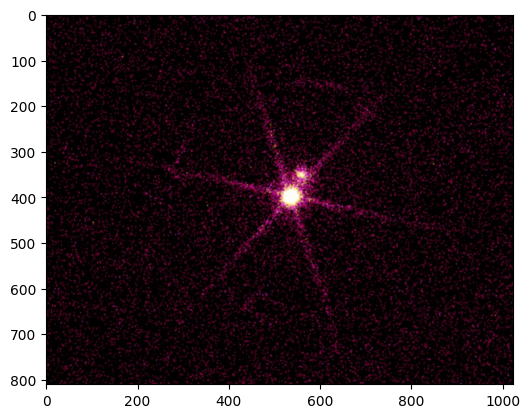

In [7]:
plt.imshow(img)

(810, 1024)

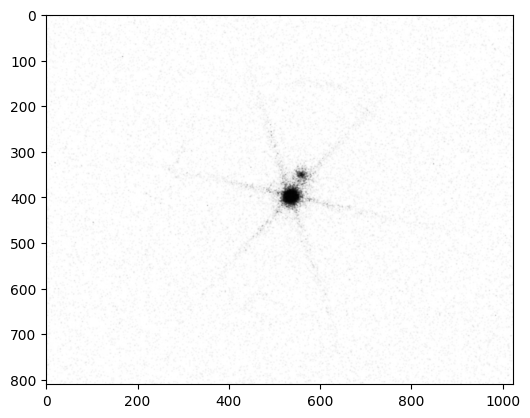

In [8]:
# Grayscale imge - only 1 channel
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale, cmap='Greys')
img_grayscale.shape

In [9]:
# Fourier transform 2D -> Spatial power spectrum
img_fft = fft.fftshift(fft.fft2(fft.fftshift(img_grayscale)))

In [10]:
maximum = img_fft.max().real
display = np.log(np.abs(img_fft))

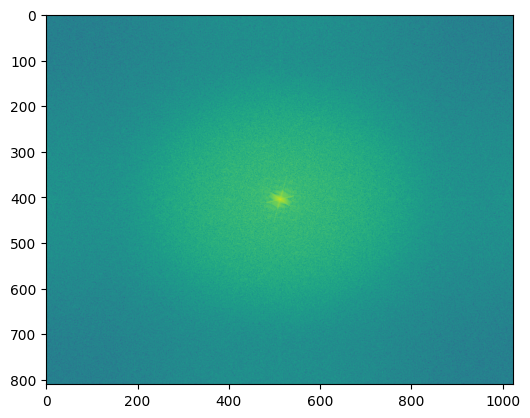

In [13]:
# Plot FFT2D of image, required log scale
plt.imshow(display/np.max(display))

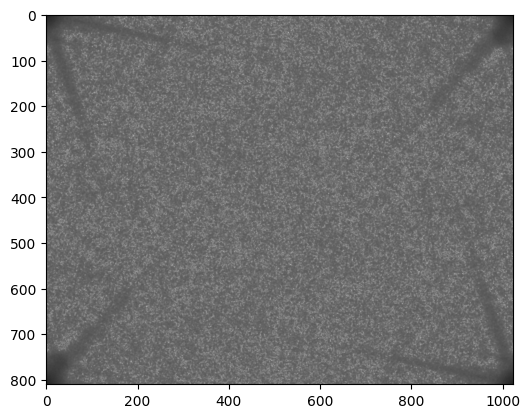

In [12]:
# Check inverse fft:
inverse = fft.ifft2(abs(img_fft))
plt.imshow(np.log(abs(inverse)),cmap='Greys')